In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings 
warnings.filterwarnings('ignore')
import pickle

In [2]:
train = pd.read_csv('train_cab.csv')

In [3]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [4]:
test = pd.read_csv('test_cab.csv')

In [5]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [6]:
print(train.shape)
print(test.shape)

(16067, 7)
(9914, 6)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16043 non-null  object 
 1   pickup_datetime    16067 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    9914 non-null   object 
 1   pickup_longitude   9914 non-null   float64
 2   pickup_latitude    9914 non-null   float64
 3   dropoff_longitude  9914 non-null   float64
 4   dropoff_latitude   9914 non-null   float64
 5   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


In [9]:
# Here in trin dataset fare is in object datatype convert it into numerical
train['fare_amount'] = pd.to_numeric(train['fare_amount'],errors='coerce')

In [10]:
#Converting pickup_datetime into datetime datatype
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'], errors='coerce').dt.tz_localize(None)
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'], errors='coerce').dt.tz_localize(None)

In [11]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [12]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fare_amount        16042 non-null  float64       
 1   pickup_datetime    16066 non-null  datetime64[ns]
 2   pickup_longitude   16067 non-null  float64       
 3   pickup_latitude    16067 non-null  float64       
 4   dropoff_longitude  16067 non-null  float64       
 5   dropoff_latitude   16067 non-null  float64       
 6   passenger_count    16012 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 878.8 KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pickup_datetime    9914 non-null   datetime64[ns]
 1   pickup_longitude   9914 non-null   float64       
 2   pickup_latitude    9914 non-null   float64       
 3   dropoff_longitude  9914 non-null   float64       
 4   dropoff_latitude   9914 non-null   float64       
 5   passenger_count    9914 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 464.8 KB


In [15]:
train.isnull().sum().sort_values(ascending=False)

passenger_count      55
fare_amount          25
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
dtype: int64

In [16]:
nan = ['passenger_count', 'fare_amount', 'pickup_datetime']
for i in nan:
    print(f'{i}:{(train[i].isnull().sum()/len(train))*100}')

passenger_count:0.34231654944918155
fare_amount:0.15559843156780978
pickup_datetime:0.006223937262712392


In [17]:
train = train.drop(train[train.isnull().any(1)].index, axis=0)

In [18]:
train.shape

(15986, 7)

In [19]:
# Dropping negative fare values
train = train.drop(train[train['fare_amount']<0].index, axis=0)

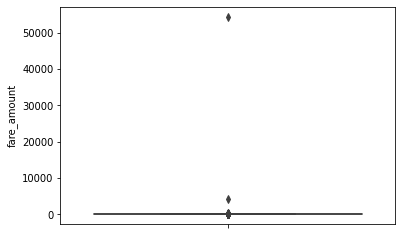

In [20]:
sns.boxplot(data=train, y='fare_amount')
plt.show()

In [21]:
train['fare_amount'].sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
           ...   
4084         2.50
9773         2.50
1427         1.14
2780         0.01
10002        0.00
Name: fare_amount, Length: 15983, dtype: float64

In [22]:
train = train.drop(train[train['fare_amount']>400].index, axis=0)

<AxesSubplot:ylabel='fare_amount'>

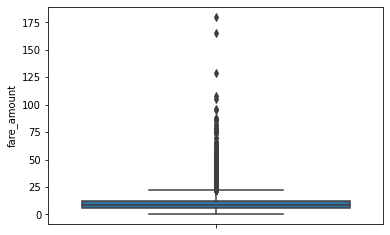

In [23]:
sns.boxplot(data=train, y='fare_amount')

In [24]:
train.shape

(15979, 7)

In [25]:
train['passenger_count'].value_counts()

1.00       11236
2.00        2318
5.00        1044
3.00         675
4.00         327
6.00         301
0.00          57
43.00          2
53.00          2
5334.00        1
236.00         1
0.12           1
1.30           1
531.20         1
87.00          1
537.00         1
58.00          1
536.00         1
535.00         1
5345.00        1
345.00         1
35.00          1
456.00         1
554.00         1
354.00         1
557.00         1
Name: passenger_count, dtype: int64

In [26]:
len(train[train['passenger_count']>6])*100/len(train)

0.11890606420927467

In [27]:
# Assume that cab has maximum 6 seats drop the rows which shows passenger count more than 6
train = train.drop(train[train['passenger_count']>6].index, axis=0)

In [28]:
train['passenger_count'].value_counts()

1.00    11236
2.00     2318
5.00     1044
3.00      675
4.00      327
6.00      301
0.00       57
1.30        1
0.12        1
Name: passenger_count, dtype: int64

In [29]:
# Dropping rows which are showing passenger count of 0,1.3,0.12
outliers = [0,1.30,0.12]
for i in outliers:
    train = train.drop(train[train['passenger_count']==i].index, axis=0)

In [30]:
train['passenger_count'].value_counts()

1.0    11236
2.0     2318
5.0     1044
3.0      675
4.0      327
6.0      301
Name: passenger_count, dtype: int64

In [31]:
train['passenger_count'] = train['passenger_count'].astype(np.int64)

In [32]:
train['passenger_count'].value_counts()

1    11236
2     2318
5     1044
3      675
4      327
6      301
Name: passenger_count, dtype: int64

***Latitude ranges between -90 to 90 and
Longitude ranges between -180 to 180***

In [33]:
latitude = ['pickup_latitude', 'dropoff_latitude']
for i in latitude:
    print(train[(train[i]<-90) | (train[i]>90)])

      fare_amount     pickup_datetime  pickup_longitude  pickup_latitude  \
5686          3.3 2011-07-30 11:15:00        -73.947235       401.083332   

      dropoff_longitude  dropoff_latitude  passenger_count  
5686         -73.951392         40.778927                1  
Empty DataFrame
Columns: [fare_amount, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count]
Index: []


In [34]:
longitude = ['pickup_longitude', 'dropoff_longitude']
for i in longitude:
    print(train[(train[i]<-180) | (train[i])>180])

Empty DataFrame
Columns: [fare_amount, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count]
Index: []
Empty DataFrame
Columns: [fare_amount, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count]
Index: []


In [35]:
# So as seen above one row has pickup latitude more than 90 so we need to drop it
train = train.drop((train[(train['pickup_latitude']<-90) | (train['pickup_latitude']>90)]).index, axis=0)

In [36]:
train.shape

(15900, 7)

In [37]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000,15900.000000
mean,11.320976,-72.474794,39.898680,-72.465053,39.899208,1.649686
std,9.668759,10.539101,6.186989,10.567028,6.186614,1.265914
min,0.000000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000
25%,6.000000,-73.992143,40.734950,-73.991181,40.734711,1.000000
50%,8.500000,-73.981686,40.752636,-73.980158,40.753564,1.000000
75%,12.500000,-73.966802,40.767382,-73.963643,40.768019,2.000000
max,180.000000,40.766125,41.366138,40.802437,41.366138,6.000000


In [38]:
def haversine_distance (lat1,log1,lat2,log2):
    data=[train, test]
    for i in data:
        radius_earth = 6371
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
        
        delta_phi = np.radians(i[lat2] - i[lat1])
        delta_lambda = np.radians(i[log2] - i[log1])
        
        a = np.sin(delta_phi/2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2.0)**2
        c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))
        d = (radius_earth * c)
        i['haversine_distance'] = d
    return d

In [39]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323259
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183942
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [40]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


In [41]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,5.387301


In [42]:
# Separate date,month,year,dayofweek,hour
data = [train,test]
for i in data:
    i['year'] = i['pickup_datetime'].dt.year
    i['month'] = i['pickup_datetime'].dt.month
    i['date'] = i['pickup_datetime'].dt.day
    i['dayofweek'] = i['pickup_datetime'].dt.dayofweek
    i['hour'] = i['pickup_datetime'].dt.hour

In [43]:
# Drop pickup datetime as we have split it
train = train.drop('pickup_datetime', axis=1)
test = test.drop('pickup_datetime', axis=1)

In [44]:
train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,month,date,dayofweek,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


***Does the number of passengers affect fare price***

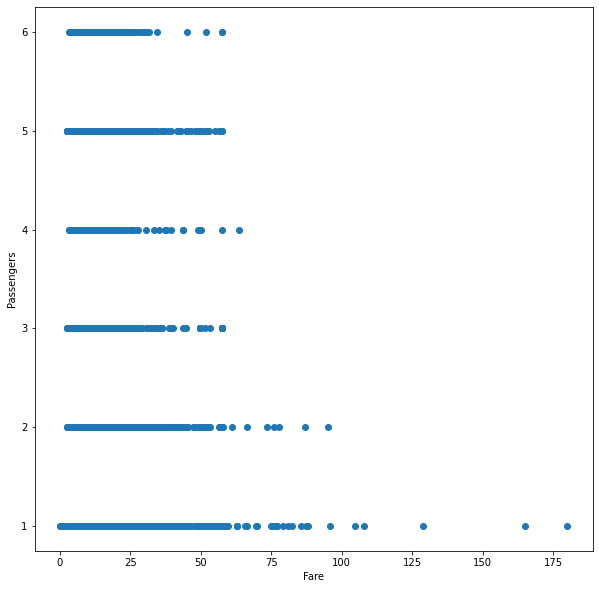

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(x='fare_amount', y='passenger_count',data=train)
plt.xlabel('Fare')
plt.ylabel('Passengers')
plt.show()

From here it seems that passenger count does not affect the fare and highest fare come from single passenger

***Does the date, time and day of week affect the fare***

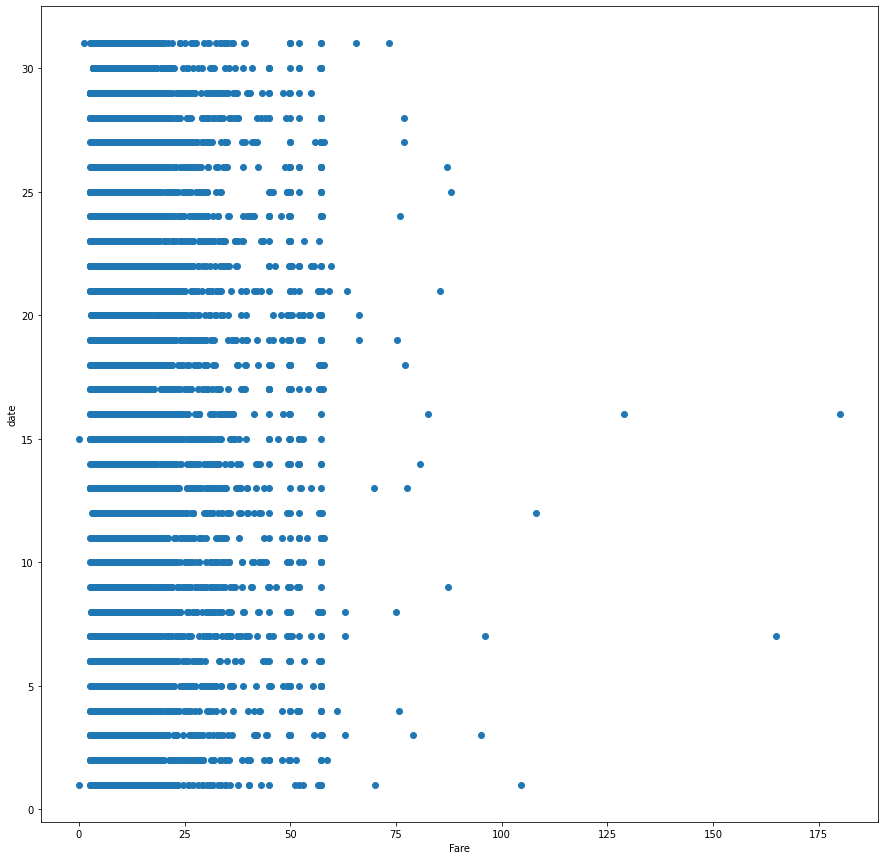

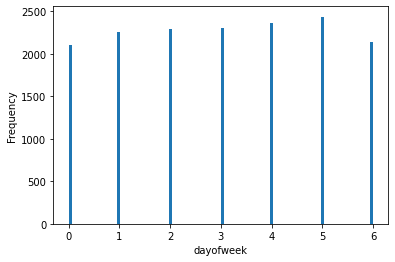

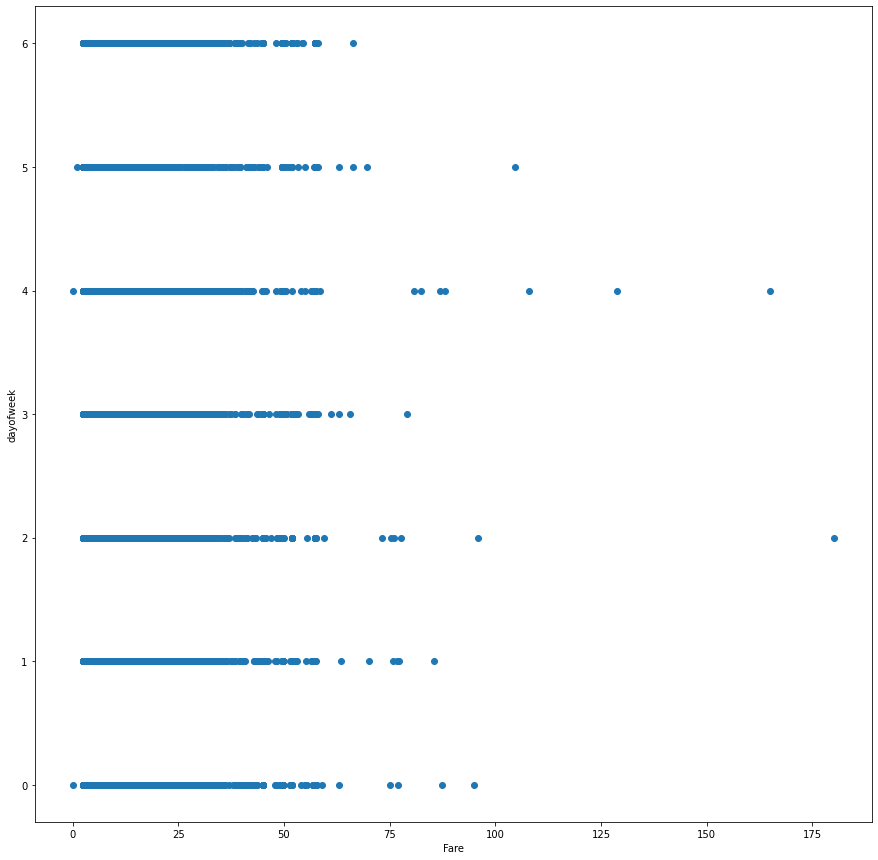

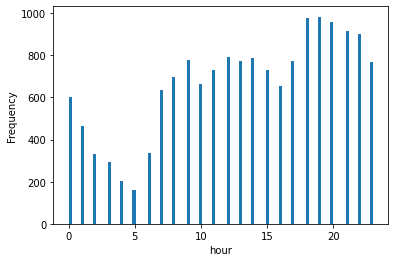

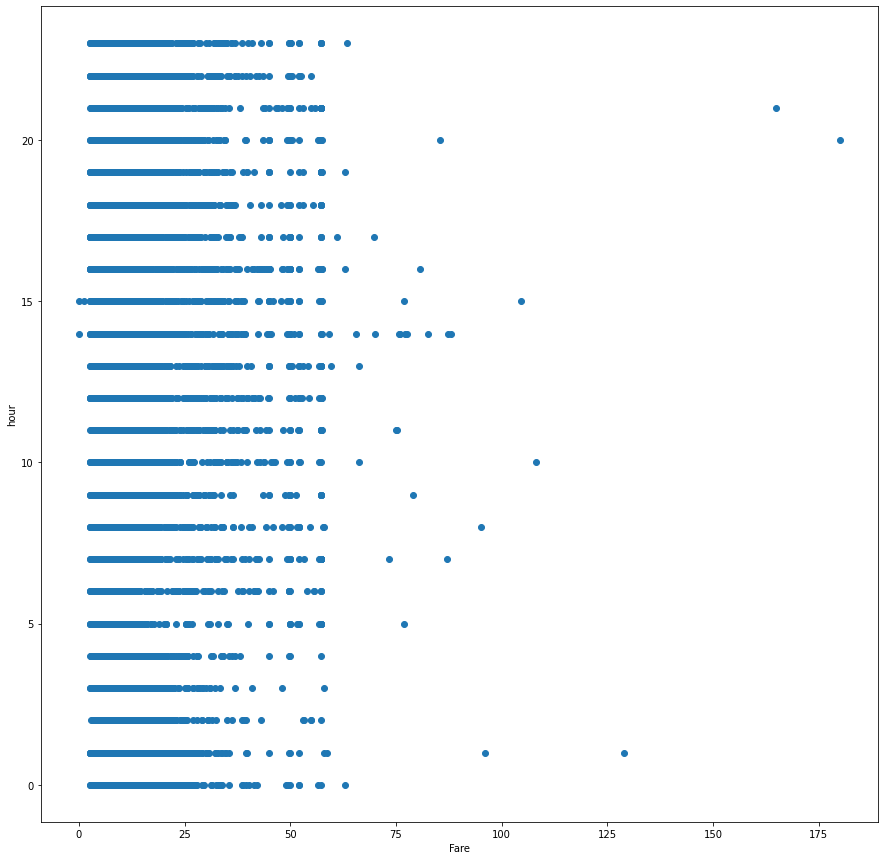

In [46]:
data = ['date', 'dayofweek', 'hour']
for i in data:
    if i!='date':
        plt.hist(i,data=train, bins=100)
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.show()
    else:
        pass
    plt.figure(figsize=(15,15))
    plt.scatter(x='fare_amount', y=i, data=train)
    plt.xlabel('Fare')
    plt.ylabel(i)
    plt.show()

From the above figure it seems that:
1) Fare throughout the month is uniform 
2) On thursday highest fare is recorded
3) At 5 AM frequency of cab rides is low and it increases at after 4 PM

***Does the distance affect the fare***

In [47]:
high_distance = train.loc[(train['haversine_distance']>200) & (train['fare_amount']!=0)]
high_distance

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,month,date,dayofweek,hour
472,2.50,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,2009,2,22,6,22
1260,5.70,-73.973907,40.754743,0.000000,0.000000,2,8665.268588,2011,3,10,3,20
2280,8.90,-73.936667,40.757815,0.000000,40.757815,1,6026.494216,2011,8,29,0,8
2397,45.00,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,2012,6,24,6,17
4278,7.00,-73.972702,40.757423,0.000000,0.000000,1,8665.223767,2015,4,7,1,23
4597,6.90,0.000000,0.000000,-73.989693,40.754280,1,8666.566030,2010,3,30,1,7
5864,8.50,-73.995030,40.744945,-7.986640,40.729937,1,5420.988959,2012,3,4,6,1
6188,15.50,0.000000,0.000000,-73.952980,40.786670,5,8664.191488,2014,7,28,0,15
6302,16.50,0.000000,0.000000,-73.936600,40.796543,1,8663.039123,2015,2,27,4,16
7014,4.50,-73.988980,40.721697,-74.001073,0.728087,3,4447.086698,2011,6,18,5,4


As you see above data it is giving abnormal distance because either co-ordinates are wrong or zero. I will replace the distance by using fare for this formula is ***distance = (fare_amount - 2.5)/1.56***

In [48]:
high_distance['haversine_distance'] = high_distance.apply(lambda row: (row['fare_amount'] - 2.50)/1.56, axis=1)

In [49]:
high_distance

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,month,date,dayofweek,hour
472,2.50,0.000000,0.000000,-74.005433,40.726685,2,0.000000,2009,2,22,6,22
1260,5.70,-73.973907,40.754743,0.000000,0.000000,2,2.051282,2011,3,10,3,20
2280,8.90,-73.936667,40.757815,0.000000,40.757815,1,4.102564,2011,8,29,0,8
2397,45.00,0.000000,0.000000,-74.010230,40.714553,2,27.243590,2012,6,24,6,17
4278,7.00,-73.972702,40.757423,0.000000,0.000000,1,2.884615,2015,4,7,1,23
4597,6.90,0.000000,0.000000,-73.989693,40.754280,1,2.820513,2010,3,30,1,7
5864,8.50,-73.995030,40.744945,-7.986640,40.729937,1,3.846154,2012,3,4,6,1
6188,15.50,0.000000,0.000000,-73.952980,40.786670,5,8.333333,2014,7,28,0,15
6302,16.50,0.000000,0.000000,-73.936600,40.796543,1,8.974359,2015,2,27,4,16
7014,4.50,-73.988980,40.721697,-74.001073,0.728087,3,1.282051,2011,6,18,5,4


In [50]:
train.update(high_distance)

In [51]:
l =['fare_amount']
k=['haversine_distance']
for i in l:
    for j in k:
        #To check where fare is zero and distance is zero
        print(train[(train[i]==0) & (train[j]==0)])
        print('-----------------------------------------------------------------------')
        #To check whether fare is less than 2.5 and distance is zero
        print(train[(train[i]<2.5) & (train[j]==0)])
        print('------------------------------------------------------------------------')

Empty DataFrame
Columns: [fare_amount, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, haversine_distance, year, month, date, dayofweek, hour]
Index: []
-----------------------------------------------------------------------
Empty DataFrame
Columns: [fare_amount, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, haversine_distance, year, month, date, dayofweek, hour]
Index: []
------------------------------------------------------------------------


In [52]:
 #To check whether fare is not zero but distance is zero
zero_distance = train.loc[(train['fare_amount']!=0) & (train['haversine_distance']==0)]
zero_distance['haversine_distance'] =zero_distance.apply(lambda row: (row['fare_amount'] - 2.50)/1.56, axis=1)

In [53]:
train.update(zero_distance)

In [54]:
#To check whether fare is zero but distance is not zero
zero_fare = train.loc[(train['fare_amount']==0) & (train['haversine_distance']!=0)]
zero_fare['fare_amount'] = 2.5 + 1.56 * zero_fare['haversine_distance']

In [55]:
train.update(zero_fare)

In [56]:
train[train['haversine_distance']==0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,month,date,dayofweek,hour
376,2.5,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,5.0,29.0,3.0,5.0
472,2.5,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,2009.0,2.0,22.0,6.0,22.0
503,2.5,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0,2010.0,1.0,19.0,1.0,1.0
657,2.5,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0,2009.0,8.0,25.0,1.0,1.0
958,2.5,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2011.0,2.0,22.0,1.0,14.0
1419,2.5,-73.956556,40.779828,-73.956556,40.779828,1.0,0.0,2013.0,7.0,21.0,6.0,0.0
1774,2.5,-73.950282,40.701282,-73.950282,40.701282,1.0,0.0,2012.0,8.0,27.0,0.0,15.0
3168,2.5,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2012.0,7.0,6.0,4.0,22.0
4367,2.5,-73.948410,40.744969,-73.948410,40.744969,1.0,0.0,2014.0,1.0,13.0,0.0,16.0
4954,2.5,-73.983934,40.754938,-73.983934,40.754938,1.0,0.0,2010.0,1.0,10.0,6.0,13.0


In [57]:
#Dropping the rows with distance xero because it has pickup and drop co-ordinates are same
train.drop(train[train['haversine_distance']==0].index, axis=0)

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,month,date,dayofweek,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,1.030764,2009.0,6.0,15.0,0.0,17.0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,8.450134,2010.0,1.0,5.0,1.0,16.0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,1.389525,2011.0,8.0,18.0,3.0,0.0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2.799270,2012.0,4.0,21.0,5.0,4.0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,1.999157,2010.0,3.0,9.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
16061,10.9,-73.994191,40.751138,-73.962769,40.769719,1.0,3.357490,2009.0,5.0,20.0,2.0,18.0
16062,6.5,-74.008820,40.718757,-73.998865,40.719987,1.0,0.850044,2014.0,12.0,12.0,4.0,7.0
16063,16.1,-73.981310,40.781695,-74.014392,40.715527,2.0,7.867638,2009.0,7.0,13.0,0.0,7.0
16064,8.5,-73.972507,40.753417,-73.979577,40.765495,1.0,1.469105,2009.0,11.0,11.0,2.0,11.0


# Univariate Analysis

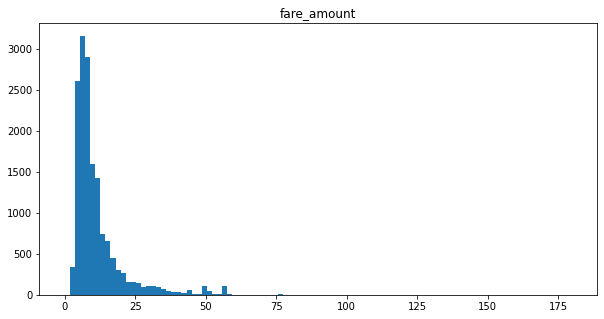

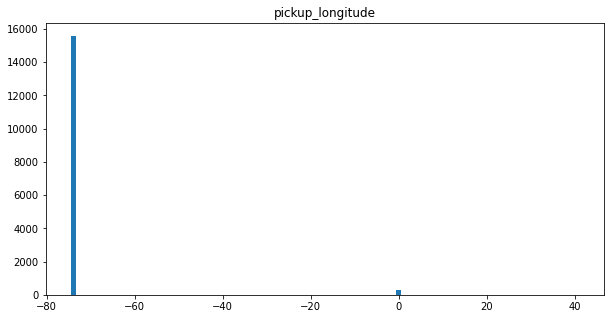

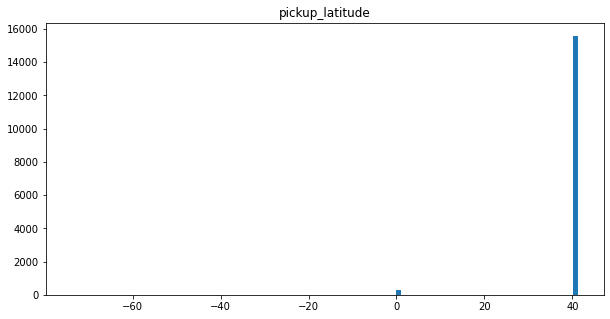

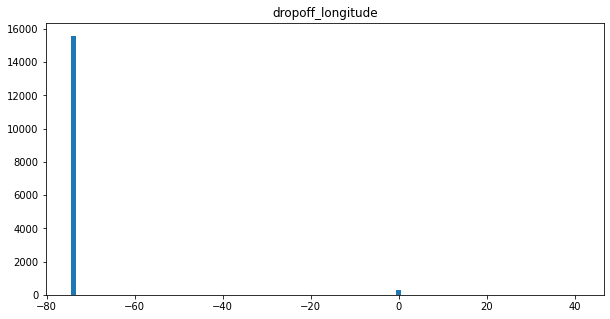

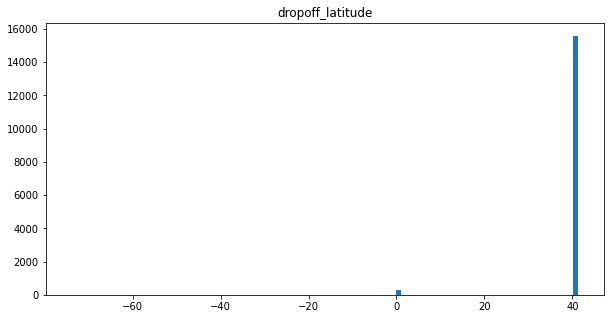

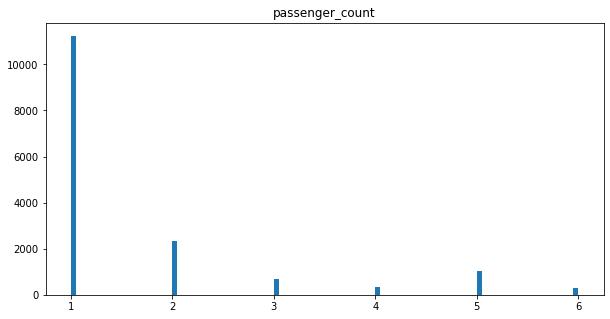

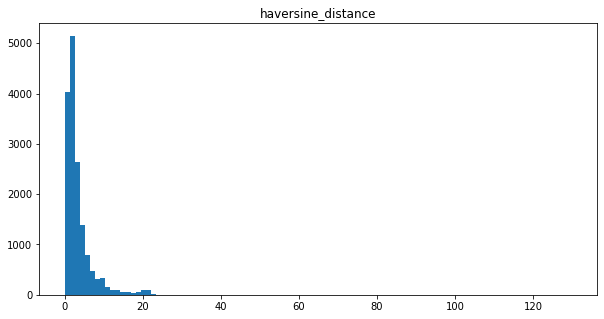

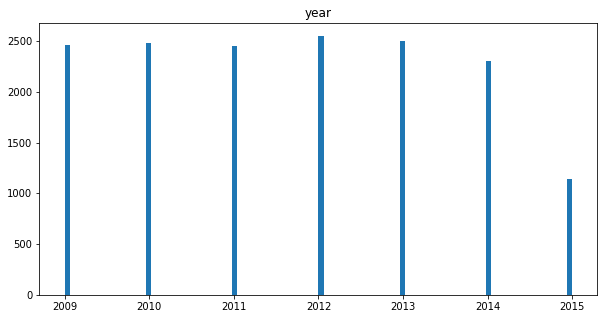

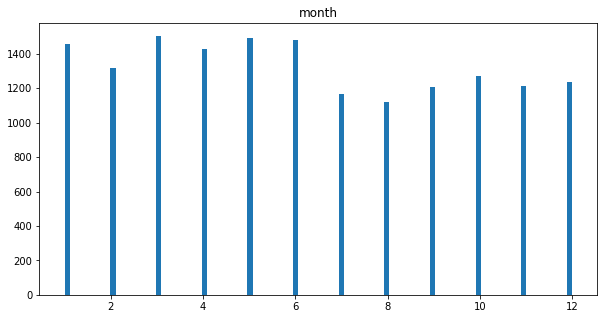

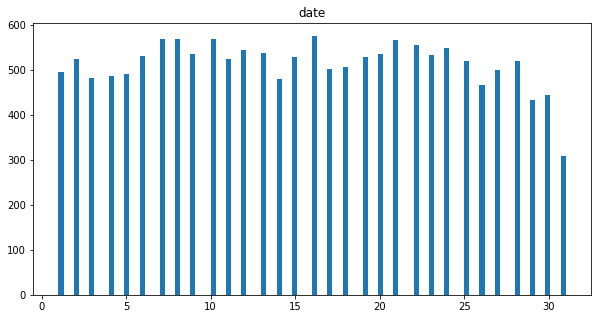

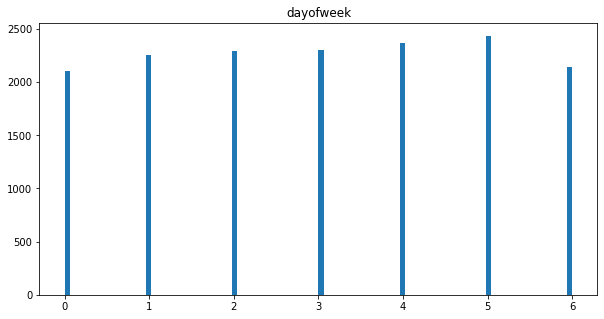

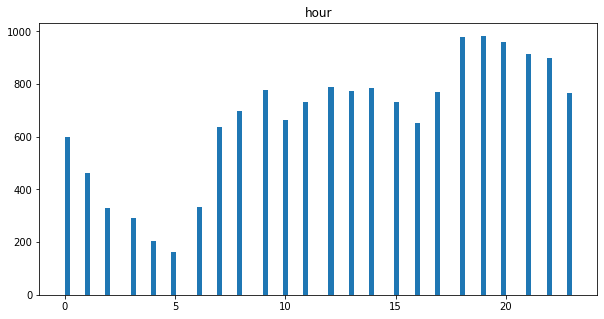

In [58]:
for i in train.columns:
    plt.figure(figsize=(10,5))
    plt.hist(i, bins=100, data=train)
    plt.title(i)
    plt.show()

# Bivariate Analysis

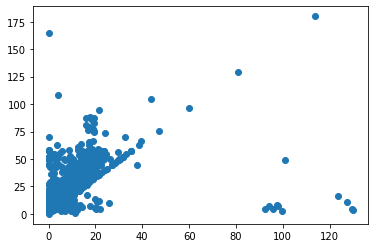

In [59]:
plt.scatter(y='fare_amount', x='haversine_distance',data=train)

From above data it is seen that ***1) Maximum fare ranges from 0 doller to 25 dollers***, ***2)Most of cab booked for single passengers***, ***3) Most cabs booked for within 20 km***

# Feature Selection

In [60]:
train.dtypes

fare_amount           float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
passenger_count       float64
haversine_distance    float64
year                  float64
month                 float64
date                  float64
dayofweek             float64
hour                  float64
dtype: object

Let's convert passenger count into integer and year, month, date, dayofweek, hour into categorical

In [61]:
train['passenger_count'] = train['passenger_count'].astype('int64')

In [62]:
data = [train,test]
convert = ['year', 'month', 'date', 'dayofweek', 'hour']
for i in data:
    for j in convert:
        i[j] = i[j].astype('object')

In [63]:
train.dtypes

fare_amount           float64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
passenger_count         int64
haversine_distance    float64
year                   object
month                  object
date                   object
dayofweek              object
hour                   object
dtype: object

In [64]:
test.dtypes

pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
passenger_count         int64
haversine_distance    float64
year                   object
month                  object
date                   object
dayofweek              object
hour                   object
dtype: object

In [65]:
numeric = list(train.select_dtypes(exclude='object'))
categorical = list(train.select_dtypes(include='object'))

In [66]:
data_corr = train.loc[:, numeric]
cor = data_corr.corr()
cor

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance
fare_amount,1.000000,0.008083,-0.009432,0.007999,-0.009436,0.006532,0.711165
pickup_longitude,0.008083,1.000000,-0.983392,0.966321,-0.954371,-0.002322,0.065176
pickup_latitude,-0.009432,-0.983392,1.000000,-0.951667,0.972736,0.001396,-0.059800
dropoff_longitude,0.007999,0.966321,-0.951667,1.000000,-0.977828,-0.003102,0.065187
dropoff_latitude,-0.009436,-0.954371,0.972736,-0.977828,1.000000,0.001077,-0.060047
passenger_count,0.006532,-0.002322,0.001396,-0.003102,0.001077,1.000000,-0.005239
haversine_distance,0.711165,0.065176,-0.059800,0.065187,-0.060047,-0.005239,1.000000


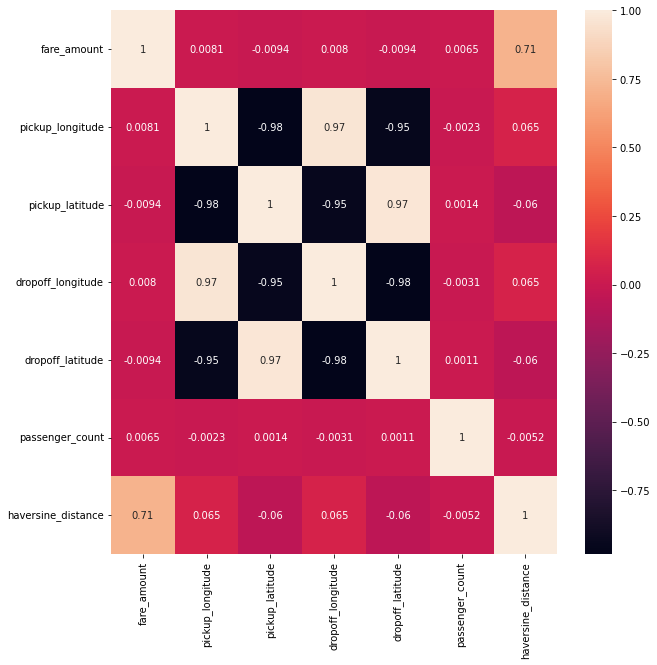

In [67]:
plt.figure(figsize=(10,10))
sns.heatmap(cor, annot=True)
plt.show()

In [68]:
# Anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
for i in categorical:
    mod = ols('fare_amount' + '~' + i, data = train).fit()
    aov_table = sm.stats.anova_lm(mod, typ = 2)
    print(aov_table)

                sum_sq       df          F        PR(>F)
year      2.154535e+04      6.0  38.964772  2.708192e-47
Residual  1.464658e+06  15893.0        NaN           NaN
                sum_sq       df         F    PR(>F)
month     4.256708e+03     11.0  4.148756  0.000004
Residual  1.481946e+06  15888.0       NaN       NaN
                sum_sq       df         F    PR(>F)
date      1.807641e+03     30.0  0.644156  0.932828
Residual  1.484395e+06  15869.0       NaN       NaN
                 sum_sq       df         F    PR(>F)
dayofweek  6.955718e+02      6.0  1.240286  0.281988
Residual   1.485507e+06  15893.0       NaN       NaN
                sum_sq       df         F        PR(>F)
hour      8.701746e+03     23.0  4.065292  1.981157e-10
Residual  1.477501e+06  15876.0       NaN           NaN


In [69]:
# From Anova test date and day of week has p value greater than 0.05
# Since we have calculated distance from co-ordinates so we can drop them

train = train.drop(['date', 'dayofweek', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1)
test = test.drop(['date', 'dayofweek', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1)

In [70]:
train.columns

Index(['fare_amount', 'passenger_count', 'haversine_distance', 'year', 'month',
       'hour'],
      dtype='object')

# Feature Scailing

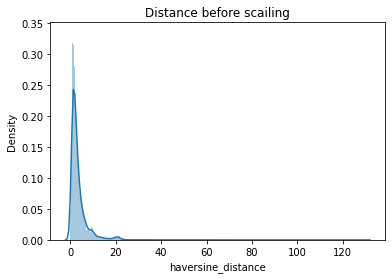

In [71]:
sns.distplot(train['haversine_distance'], bins='auto')
plt.title('Distance before scailing')
plt.show()

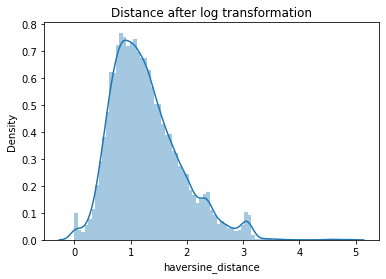

In [72]:
train['haversine_distance'] = np.log(train['haversine_distance']+1)
sns.distplot(train['haversine_distance'], bins='auto')
plt.title('Distance after log transformation')
plt.show()

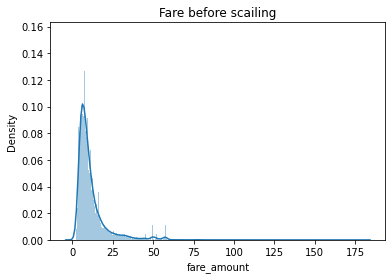

In [73]:
sns.distplot(train['fare_amount'], bins='auto')
plt.title('Fare before scailing')
plt.show()

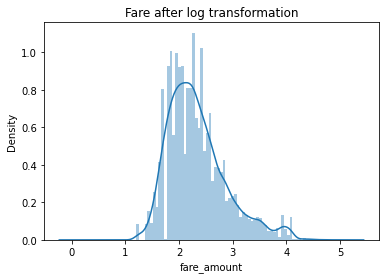

In [74]:
train['fare_amount'] = np.log(train['fare_amount']+1)
sns.distplot(train['fare_amount'], bins='auto')
plt.title('Fare after log transformation')
plt.show()

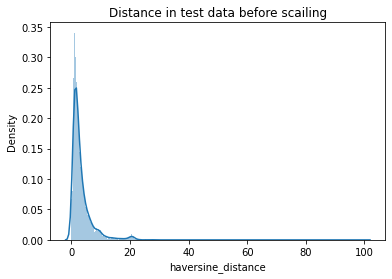

In [75]:
sns.distplot(test['haversine_distance'], bins='auto')
plt.title('Distance in test data before scailing')
plt.show()

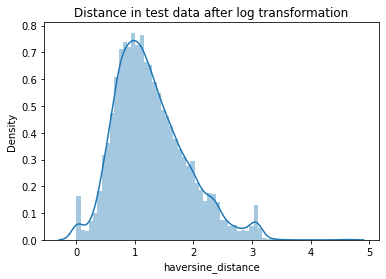

In [76]:
test['haversine_distance'] = np.log(test['haversine_distance']+1)
sns.distplot(test['haversine_distance'], bins='auto')
plt.title('Distance in test data after log transformation')
plt.show()

In [77]:
#Separating features and target
X = train.drop('fare_amount',axis=1)
y = train[['fare_amount']]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=1)

# Linear Regression

In [79]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [80]:
pred = lr.predict(X_test)

In [81]:
np.sqrt(mean_squared_error(y_test, pred))

0.2637212346855098

In [82]:
r2_score(y_test, pred)

0.7666443620475851

# Decision Tree

In [83]:
dt = DecisionTreeRegressor()
pred_dt = dt.fit(X_train, y_train).predict(X_test)
print(f'rms using decision tree : {np.sqrt(mean_squared_error(y_test, pred_dt))}')
print(f'r square using decision tree is : {r2_score(y_test, pred_dt)}')

rms using decision tree : 0.35095894740533223
r square using decision tree is : 0.5867234769351011


# Random Forest

In [84]:
rf = RandomForestRegressor()
pred_rf = rf.fit(X_train, y_train).predict(X_test)
print(f'rms using random forest : {np.sqrt(mean_squared_error(y_test, pred_rf))}')
print(f'r square using random forest is : {r2_score(y_test, pred_rf)}')

rms using random forest : 0.25001998779636075
r square using random forest is : 0.79026179028032


# Gradient Boosting

In [85]:
gb = GradientBoostingRegressor()
pred_gb = gb.fit(X_train, y_train).predict(X_test)
print(f'rms using gradient boosting : {np.sqrt(mean_squared_error(y_test, pred_gb))}')
print(f'r square using gradient boosting is : {r2_score(y_test, pred_gb)}')

rms using gradient boosting : 0.23916874790701997
r square using gradient boosting is : 0.8080726100973918


# Hyperparameter Optimization

In [86]:
print('Parameters currently used are')
gb.get_params()

Parameters currently used are


{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# Randomized Search CV

In [87]:
param_grid = {'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
             'min_samples_leaf' : list(range(1,10,2)),
             'min_samples_split' : list(range(1,10,2)),
             'n_estimators' : list(range(1,150)),
             'max_depth' : list(range(1,10)),
             }
rsc_gb = RandomizedSearchCV(gb, param_distributions=param_grid, n_iter=5, cv=5, verbose=2)
rsc_gb.fit(X_train, y_train)
rsc_gb_pred = rsc_gb.predict(X_test)
print(f'root mean squared using randomized search : {np.sqrt(mean_squared_error(y_test,rsc_gb_pred))}')
print(f'r square using randomized search : {r2_score(y_test, rsc_gb_pred)}')
rsc_gb.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END loss=quantile, max_depth=1, min_samples_leaf=7, min_samples_split=7, n_estimators=108; total time=   0.3s
[CV] END loss=quantile, max_depth=1, min_samples_leaf=7, min_samples_split=7, n_estimators=108; total time=   0.3s
[CV] END loss=quantile, max_depth=1, min_samples_leaf=7, min_samples_split=7, n_estimators=108; total time=   0.2s
[CV] END loss=quantile, max_depth=1, min_samples_leaf=7, min_samples_split=7, n_estimators=108; total time=   0.3s
[CV] END loss=quantile, max_depth=1, min_samples_leaf=7, min_samples_split=7, n_estimators=108; total time=   0.2s
[CV] END loss=quantile, max_depth=8, min_samples_leaf=5, min_samples_split=5, n_estimators=40; total time=   1.2s
[CV] END loss=quantile, max_depth=8, min_samples_leaf=5, min_samples_split=5, n_estimators=40; total time=   1.3s
[CV] END loss=quantile, max_depth=8, min_samples_leaf=5, min_samples_split=5, n_estimators=40; total time=   1.2s
[CV] END loss=quantile,

{'n_estimators': 47,
 'min_samples_split': 9,
 'min_samples_leaf': 7,
 'max_depth': 7,
 'loss': 'absolute_error'}

In [88]:
test_prediction = rsc_gb.predict(test)
test['Predicted Fare'] = test_prediction
test

,passenger_count,haversine_distance,year,month,hour,Predicted Fare
0,1,1.200946,2015,1,13,2.378319
1,1,1.231205,2015,1,13,2.375703
2,1,0.481579,2011,10,11,1.640964
3,1,1.085538,2012,12,21,2.209227
4,1,1.854312,2012,12,21,2.754455
...,...,...,...,...,...,...
9909,6,1.139394,2015,5,12,2.381108
9910,6,1.451841,2015,1,17,2.577328
9911,6,3.004887,2015,4,20,3.922078
9912,6,2.234679,2015,1,1,3.204870


In [89]:
filename = 'Cab fare prediction.pkl'
pickle.dump(rsc_gb,open(filename,'wb'))